In [1]:
import pandas as pd

In [2]:
#df = pd.read_csv("mabel.txt",header=None,error_bad_lines=False,encoding='utf8')

In [3]:
df = pd.read_csv("mabel.txt", header=None, on_bad_lines='skip', encoding='utf8')


In [20]:
df.head()

,date,chat
1,05/12/19,1:42 pm - Mabel Infoziant: Hi this is Mabel w...
2,05/12/19,1:42 pm - Mabel Infoziant: What’s your full name
3,05/12/19,1:42 pm - AR❤: Ramisha Rani K
4,05/12/19,1:42 pm - Mabel Infoziant: Ok
5,05/12/19,1:42 pm - Mabel Infoziant: ramisharanik@gmail...


In [9]:
df=df.drop(0)

In [10]:
df.columns=['date','chat']

In [21]:
time=df['chat'].str.split('-',n=1,expand=True)
time.columns=['time','namechat']
name=time['namechat'].str.split(':',n=1,expand=True)
name.head()

,0,1
1,Mabel Infoziant,Hi this is Mabel we just spoke
2,Mabel Infoziant,What’s your full name
3,AR❤,Ramisha Rani K
4,Mabel Infoziant,Ok
5,Mabel Infoziant,ramisharanik@gmail.com


In [22]:
name.columns=['name','chat']
name.head()

,name,chat
1,Mabel Infoziant,Hi this is Mabel we just spoke
2,Mabel Infoziant,What’s your full name
3,AR❤,Ramisha Rani K
4,Mabel Infoziant,Ok
5,Mabel Infoziant,ramisharanik@gmail.com


In [24]:
#df=df.drop('chat')
df['time']=time['time']
df['name']=name['name']
df['chat']=name['chat']
df.head()

,date,chat,time,name
1,05/12/19,Hi this is Mabel we just spoke,1:42 pm,Mabel Infoziant
2,05/12/19,What’s your full name,1:42 pm,Mabel Infoziant
3,05/12/19,Ramisha Rani K,1:42 pm,AR❤
4,05/12/19,Ok,1:42 pm,Mabel Infoziant
5,05/12/19,ramisharanik@gmail.com,1:42 pm,Mabel Infoziant


In [27]:
df=df[['date','time','name','chat']]
df.head()

,date,time,name,chat
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K
4,05/12/19,1:42 pm,Mabel Infoziant,Ok
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 1 to 50
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    50 non-null     object
 1   time    50 non-null     object
 2   name    50 non-null     object
 3   chat    50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [30]:
dataset=df

In [31]:
dataset.dropna(inplace=True)

In [34]:
sid = SentimentIntensityAnalyzer()

In [33]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Prabhu\AppData\Roaming\nltk_data...


True

In [37]:
senti=sid.polarity_scores(dataset['chat'][4])
senti

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.296}

In [38]:
def sentimentalAnalysis(data,columnname):
        
        #downloading vader_lexicon for the process
        import matplotlib.pyplot as plt
        import seaborn as sns
        "Importing Necessary Packeage"
        from nltk.sentiment.vader import SentimentIntensityAnalyzer
        sid = SentimentIntensityAnalyzer()
        
        "Deleting null pr empty value"
        data.dropna(inplace=True)
        
        "Checking for a comment"
        #sid.polarity_scores(data[columnname][93])
        
        "Creating respective columns"
        
        data['scores'] = data[columnname].apply(lambda commentText: sid.polarity_scores(commentText))
        data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])
        data['Negtive']  = data['scores'].apply(lambda score_dict: score_dict['neg'])
        data['Postive']  = data['scores'].apply(lambda score_dict: score_dict['pos'])
        data['Neutral']  = data['scores'].apply(lambda score_dict: score_dict['neu'])
        
        "Creating final pos or neg using compound score"
        data['comp_score'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')
        plt.clf()
        #comp=sns.countplot(x = 'comp_score', hue = 'Name', data = data, palette = 'magma')
        #comp.figure.savefig("date_charts.png")
        "Checking how many pos and neg"
        posneg=pd.DataFrame(data['comp_score'].value_counts())
        return posneg,data

In [41]:
pos,data_Senti=sentimentalAnalysis(dataset,columnname='chat')

<Figure size 640x480 with 0 Axes>

In [43]:
pos

,count
comp_score,
pos,48
neg,2


In [47]:
print(type(pos))
print(pos.shape if hasattr(pos, 'shape') else len(pos))
print(pos[:5])  # Check the first few elements


<class 'pandas.core.frame.DataFrame'>
(2, 1)
            count
comp_score       
pos            48
neg             2


In [49]:
import numpy as np
pos = np.ravel(pos)
pos

array([48,  2])

In [50]:
print(len(dataset['chat']), len(pos))


50 2


In [57]:
data_Senti

,date,time,name,chat,scores,compound,Negtive,Postive,Neutral,comp_score
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
4,05/12/19,1:42 pm,Mabel Infoziant,Ok,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2960,0.000,1.000,0.000,pos
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
6,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
7,05/12/19,1:43 pm,AR❤,Yes Mam,"{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...",0.4019,0.000,0.730,0.270,pos
8,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
9,05/12/19,1:43 pm,AR❤,Yeah mam,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,0.000,0.688,0.312,pos
10,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos


In [62]:
# Ensure sentiment analysis outputs match the input dataset
pos, data_Senti = sentimentalAnalysis(dataset, columnname='chat')

# Check and resolve length mismatch
if isinstance(pos, pd.DataFrame):
    # Select the correct column containing sentiment data
    pos = pos['count'].tolist()  # Replace 'Sentiment' with the actual column name if different

if len(pos) != len(dataset['chat']):
    print(f"Mismatch: len(pos)={len(pos)}, len(chat)={len(dataset['chat'])}")
    pos = pos + ['Neutral'] * (len(dataset['chat']) - len(pos))  # Pad with 'Neutral'

# Create the DataFrame
data_Senti = pd.DataFrame({
    'chat': dataset['chat'],  # Original text
    'Sentiment': pos          # Sentiment classifications
})

# Display the sentiment counts
print(data_Senti['Sentiment'].value_counts())



Mismatch: len(pos)=2, len(chat)=50
Sentiment
Neutral    48
48          1
2           1
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

In [46]:
data_Senti

,date,time,name,chat,scores,compound,Negtive,Postive,Neutral,comp_score
1,05/12/19,1:42 pm,Mabel Infoziant,Hi this is Mabel we just spoke,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
2,05/12/19,1:42 pm,Mabel Infoziant,What’s your full name,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
3,05/12/19,1:42 pm,AR❤,Ramisha Rani K,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
4,05/12/19,1:42 pm,Mabel Infoziant,Ok,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.2960,0.000,1.000,0.000,pos
5,05/12/19,1:42 pm,Mabel Infoziant,ramisharanik@gmail.com,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
6,05/12/19,1:43 pm,Mabel Infoziant,Your email Id?,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
7,05/12/19,1:43 pm,AR❤,Yes Mam,"{'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...",0.4019,0.000,0.730,0.270,pos
8,05/12/19,1:43 pm,Mabel Infoziant,I will send 2 abstracts for u to start working,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos
9,05/12/19,1:43 pm,AR❤,Yeah mam,"{'neg': 0.0, 'neu': 0.312, 'pos': 0.688, 'comp...",0.2960,0.000,0.688,0.312,pos
10,05/12/19,1:43 pm,Mabel Infoziant,Give me the list that u have too,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000,0.000,1.000,pos


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Example dataset with sentiment classification
data_Senti = pd.DataFrame({
    'chat': dataset['chat'],   # Original text
    'Sentiment': pos           # Sentiment classifications: Positive, Negative, Neutral
})

# Count the number of occurrences for each sentiment
sentiment_counts = data_Senti['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Neutral    48
48          1
2           1
Name: count, dtype: int64


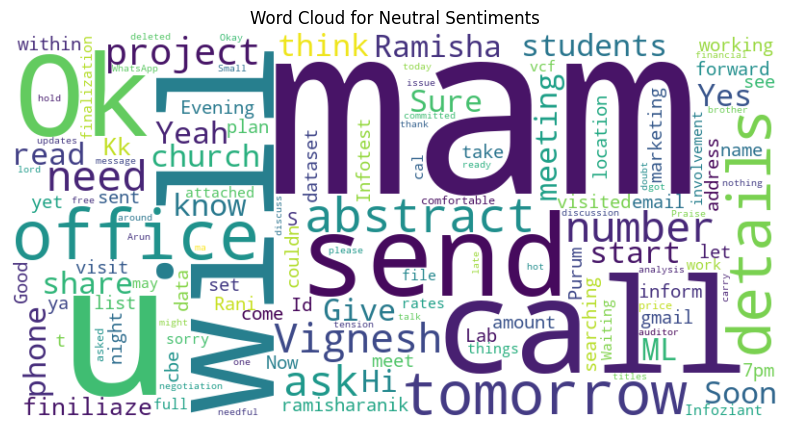

In [85]:
from wordcloud import WordCloud

# Generate a word cloud for Neutral sentiments
positive_text = " ".join(data_Senti[data_Senti['Sentiment'] == 'Neutral']['chat'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Neutral Sentiments")
plt.show()


In [78]:
print(data_Senti.columns)

Index(['chat', 'Sentiment'], dtype='object')


C:\Users\Prabhu\AppData\Local\Temp\ipykernel_11980\2032484586.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


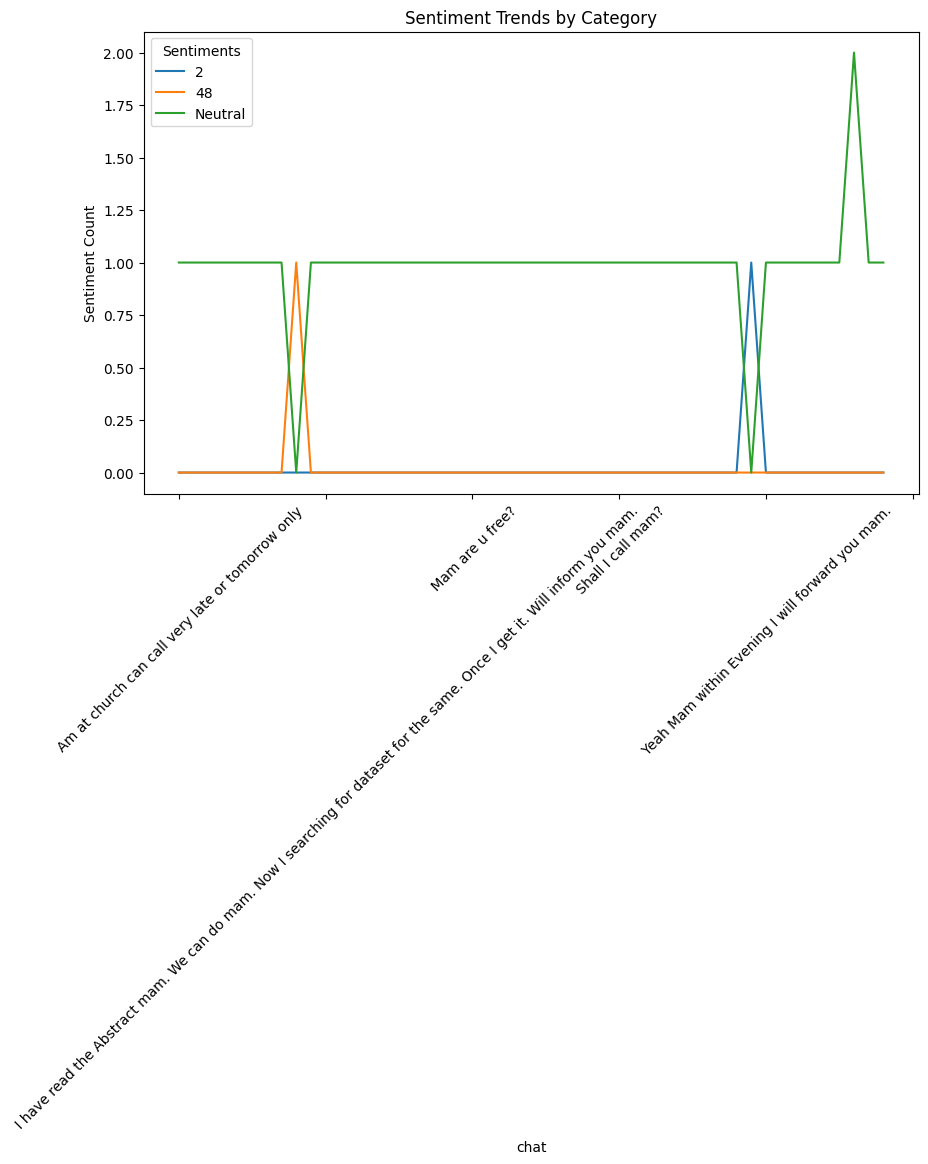

In [80]:
# Check column names
#print("Columns in data_Senti:", data_Senti.columns)

# Replace 'name' with the correct column name
correct_column_name = 'chat'  # Update with the actual column name
grouped_data = data_Senti.groupby([correct_column_name, 'Sentiment']).size().unstack(fill_value=0)

# Plot the line chart
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='line', ax=plt.gca())
plt.title("Sentiment Trends by Category")
plt.xlabel(correct_column_name)
plt.ylabel("Sentiment Count")
plt.legend(title="Sentiments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




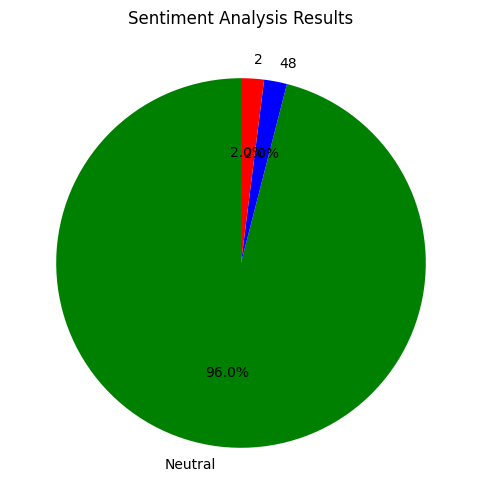

In [70]:
# Pie chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green', 'blue', 'red'])
plt.title("Sentiment Analysis Results")
plt.ylabel("")  # Hide the y-axis label for a cleaner pie chart
plt.show()


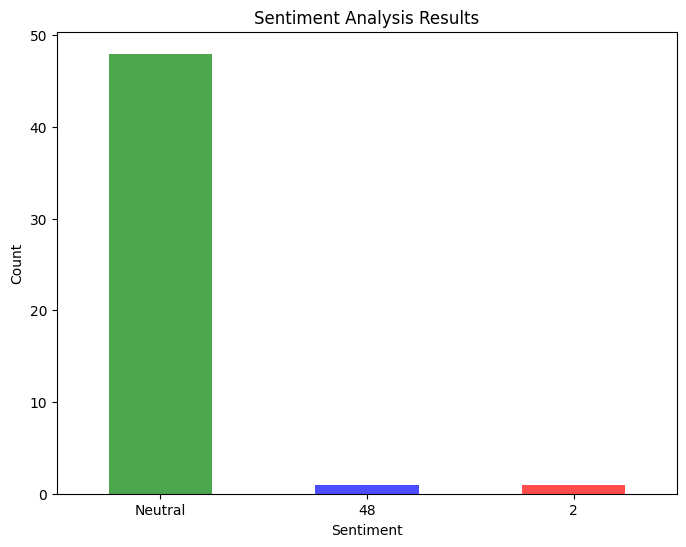

In [71]:
# Bar chart
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'], alpha=0.7)
plt.title("Sentiment Analysis Results")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()
